In [1]:
!pip install xgboost

In [3]:
!pip install lightgbm

In [7]:
import pandas as pd
data=pd.read_csv(r"C:\Users\basav\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb

In [13]:
np.random.seed(42)
data['Survived'] = np.random.randint(0, 2, size=len(data))

In [17]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [19]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 37.7+ KB


In [23]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.507177
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.500548
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


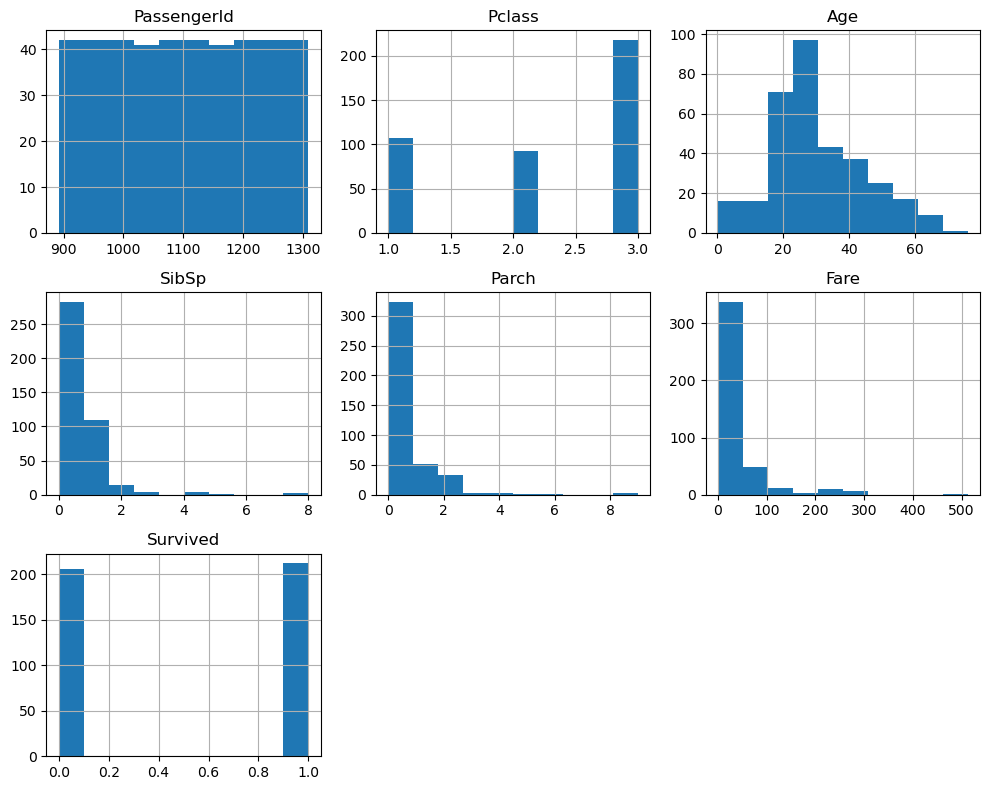

In [25]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

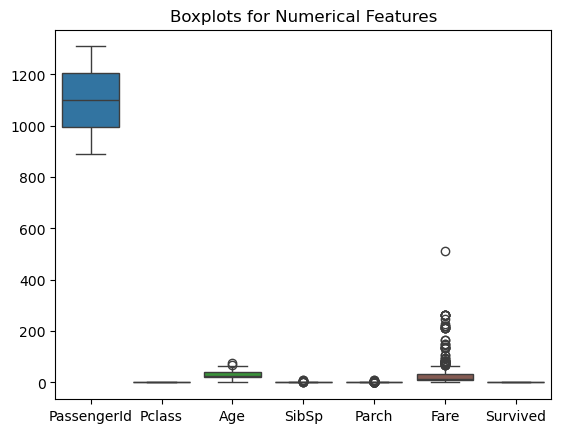

In [27]:
sns.boxplot(data=data.select_dtypes(include=['number']))
plt.title("Boxplots for Numerical Features")
plt.show()

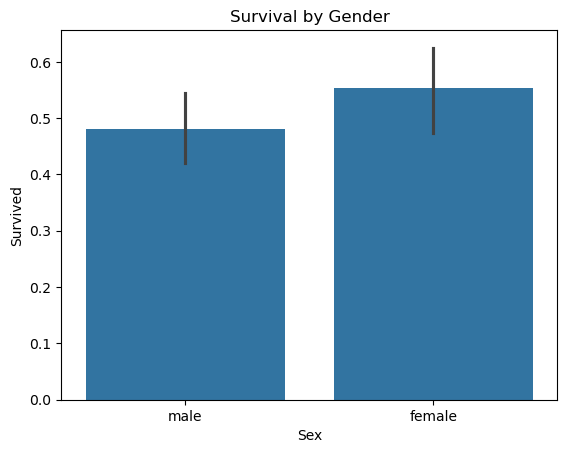

In [29]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival by Gender")
plt.show()

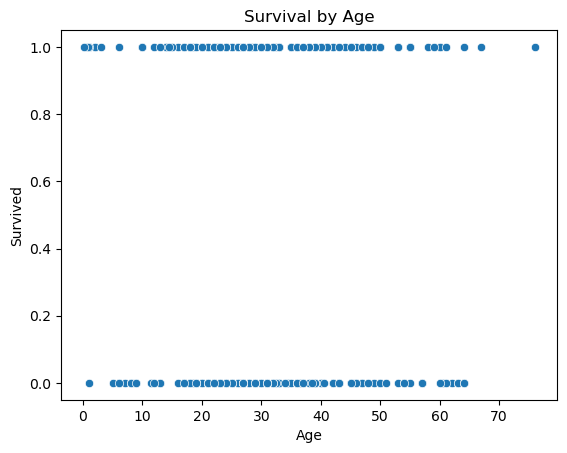

In [49]:
if 'Age' in data.columns:
    sns.scatterplot(x='Age', y='Survived', data=data)
    plt.title("Survival by Age")
    plt.show()

In [51]:
from sklearn.impute import SimpleImputer

In [53]:
if 'Age' in data.columns:
    age_imputer = SimpleImputer(strategy='median')
    data['Age'] = age_imputer.fit_transform(data[['Age']])

In [57]:
if 'Embarked' in data.columns:
    embarked_imputer = SimpleImputer(strategy='most_frequent')
    data['Embarked'] = embarked_imputer.fit_transform(data[['Embarked']]).ravel()


In [61]:
if 'Cabin' in data.columns:
    data.drop(columns=['Cabin'], inplace=True)

In [65]:
if 'Sex' in data.columns or 'Embarked' in data.columns:
    encoded_data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
else:
    encoded_data = data.copy()

In [69]:
encoded_data.drop(columns=[col for col in ['Name', 'Ticket'] if col in encoded_data.columns], inplace=True)

In [71]:
X = encoded_data.drop(columns=['Survived'])
y = encoded_data['Survived']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 166, number of negative: 168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497006 -> initscore=-0.011976
[LightGBM] [Info] Start training from score -0.011976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [77]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

C:\Users\basav\anaconda7\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [109]:
print("\n")
evaluate_model(y_test, lgb_pred, "LightGBM")



Performance of LightGBM:
Accuracy: 0.5238095238095238
Precision: 0.5625
Recall: 0.5869565217391305
F1 Score: 0.574468085106383
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46        38
           1       0.56      0.59      0.57        46

    accuracy                           0.52        84
   macro avg       0.52      0.52      0.52        84
weighted avg       0.52      0.52      0.52        84



In [107]:
print("\n")
evaluate_model(y_test, xgb_pred, "XGBoost")



Performance of XGBoost:
Accuracy: 0.5
Precision: 0.5454545454545454
Recall: 0.5217391304347826
F1 Score: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46        38
           1       0.55      0.52      0.53        46

    accuracy                           0.50        84
   macro avg       0.50      0.50      0.50        84
weighted avg       0.50      0.50      0.50        84



In [83]:
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

In [103]:
grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 133, number of negative: 134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 267, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498127 -> initscore=-0.007491
[LightGBM] [Info] Start training from score -0.007491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50]},
             scoring='accuracy')

In [105]:
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)

Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}


In [87]:
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

In [89]:
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                               param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

C:\Users\basav\anaconda7\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\basav\anaconda7\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\basav\anaconda7\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\basav\anaconda7\Lib\site-packages\

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [90]:
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}


In [93]:
results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, lgb_pred), accuracy_score(y_test, xgb_pred)],
    "Precision": [precision_score(y_test, lgb_pred), precision_score(y_test, xgb_pred)],
    "Recall": [recall_score(y_test, lgb_pred), recall_score(y_test, xgb_pred)],
    "F1 Score": [f1_score(y_test, lgb_pred), f1_score(y_test, xgb_pred)]
}

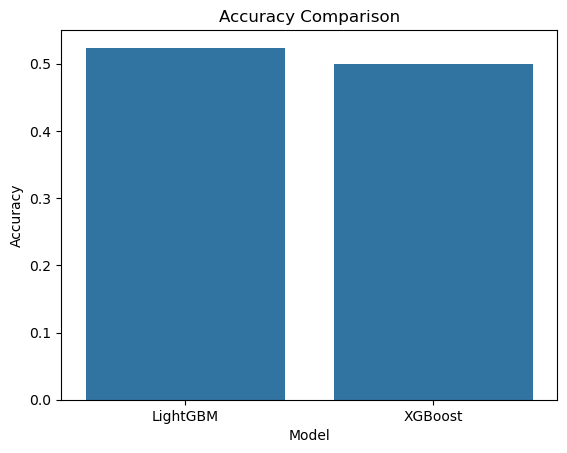

In [95]:
results_df = pd.DataFrame(results)
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Accuracy Comparison")
plt.show()

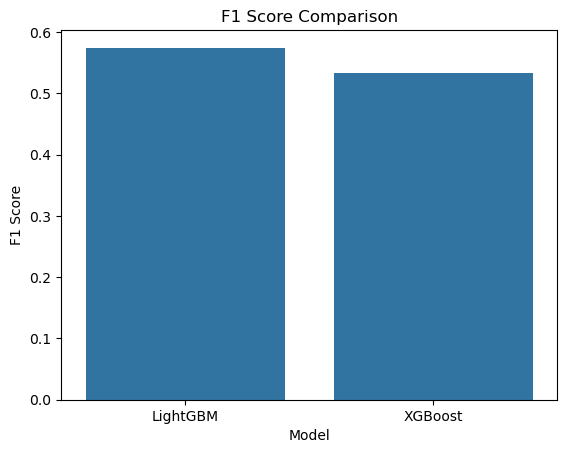

In [101]:
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("F1 Score Comparison")
plt.show()

In [99]:
print(results_df)

      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM   0.52381   0.562500  0.586957  0.574468
1   XGBoost   0.50000   0.545455  0.521739  0.533333
